##### Copyright 2019 The TensorFlow Authors.

In [2]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Load NumPy data

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/load_data/numpy"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/load_data/numpy.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/load_data/numpy.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/load_data/numpy.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

This tutorial provides an example of loading data from NumPy arrays into a `tf.data.Dataset`.

This example loads the MNIST dataset from a `.npz` file. However, the source of the NumPy arrays is not important.


## Setup

In [3]:
 
import numpy as np
import tensorflow as tf

### Load from `.npz` file

In [4]:
DATA_URL = 'https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz'

path = tf.keras.utils.get_file('mnist.npz', DATA_URL)
with np.load(path) as data:
  train_examples = data['x_train']
  train_labels = data['y_train']
  test_examples = data['x_test']
  test_labels = data['y_test']

11493376/11490434 [==============================] - 0s 0us/step


In [5]:
print(train_examples.shape)
type(train_examples)

(60000, 28, 28)


numpy.ndarray

In [6]:
print(test_examples.shape)
type(test_examples)

(10000, 28, 28)


numpy.ndarray

In [7]:
print(train_labels.shape)

(60000,)


In [8]:
for i in range(5):
   print(train_labels[i])

5
0
4
1
9


In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

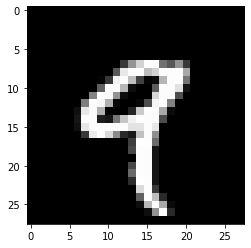

In [10]:
# pick a sample to plot
sample = 4
image = train_examples[sample]
# plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

## Load NumPy arrays with `tf.data.Dataset`

Assuming you have an array of examples and a corresponding array of labels, pass the two arrays as a tuple into `tf.data.Dataset.from_tensor_slices` to create a `tf.data.Dataset`.

In [11]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_examples, train_labels))
test_dataset = tf.data.Dataset.from_tensor_slices((test_examples, test_labels))

In [12]:
train_dataset

<TensorSliceDataset shapes: ((28, 28), ()), types: (tf.uint8, tf.uint8)>

## Use the datasets

### Shuffle and batch the datasets

In [13]:
BATCH_SIZE = 64
SHUFFLE_BUFFER_SIZE = 100

train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [14]:
train_dataset

<BatchDataset shapes: ((None, 28, 28), (None,)), types: (tf.uint8, tf.uint8)>

### Build and train a model

In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

model.compile(optimizer=tf.keras.optimizers.RMSprop(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['sparse_categorical_accuracy'])

In [16]:
model.fit(train_dataset, epochs=10)

Train for 938 steps
Epoch 1/10
938/938 [==============================] - 313s 334ms/step - loss: 3.4359 - sparse_categorical_accuracy: 0.8739
Epoch 2/10
938/938 [==============================] - 309s 329ms/step - loss: 0.5069 - sparse_categorical_accuracy: 0.9277s - loss: 0.5104 - sparse_cate
Epoch 3/10
938/938 [==============================] - 310s 331ms/step - loss: 0.3759 - sparse_categorical_accuracy: 0.9444
Epoch 4/10
938/938 [==============================] - 309s 330ms/step - loss: 0.3110 - sparse_categorical_accuracy: 0.9549
Epoch 5/10
938/938 [==============================] - 308s 329ms/step - loss: 0.2793 - sparse_categorical_accuracy: 0.9612
Epoch 6/10
938/938 [==============================] - 309s 329ms/step - loss: 0.2640 - sparse_categorical_accuracy: 0.9644
Epoch 7/10
938/938 [==============================] - 310s 330ms/step - loss: 0.2561 - sparse_categorical_accuracy: 0.9672
Epoch 8/10
938/938 [==============================] - 308s 328ms/step - loss: 0.2506 - sp

In [17]:
model.evaluate(test_dataset)

157/157 [==============================] - 33s 208ms/step - loss: 0.6955 - sparse_categorical_accuracy: 0.9576


[0.6955000557289046, 0.9576]